Here is a simplified example of how you might perform time series analysis with pandas in a Jupyter notebook using the AirPassengers dataset, which is a built-in dataset in Python's seaborn library.

1. Importing the necessary libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

2. Load the dataset:

In [2]:
# Load the AirPassengers dataset
flights = sns.load_dataset('flights')
flights = flights.pivot('month', 'year', 'passengers')
flights = flights.sum().astype('double')

3. Visualize the dataset:

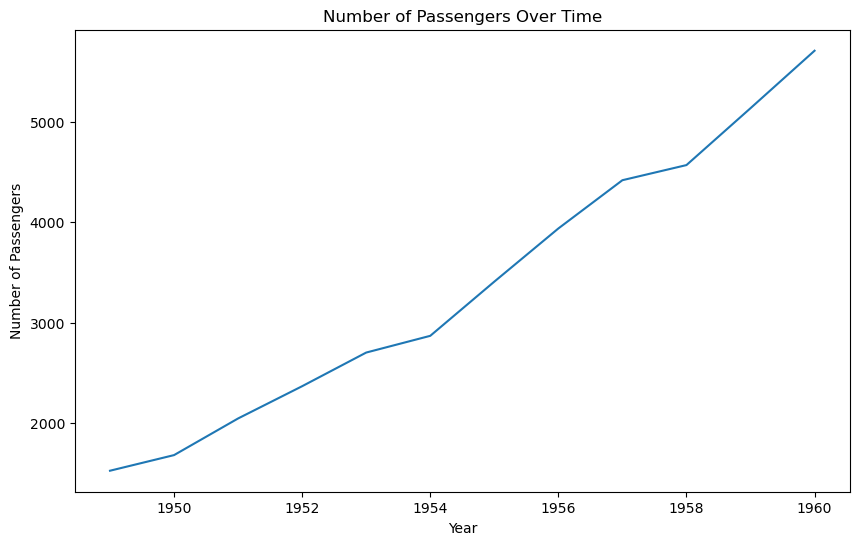

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(flights)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Over Time')
plt.show()

4. Implementing a Moving Average model:

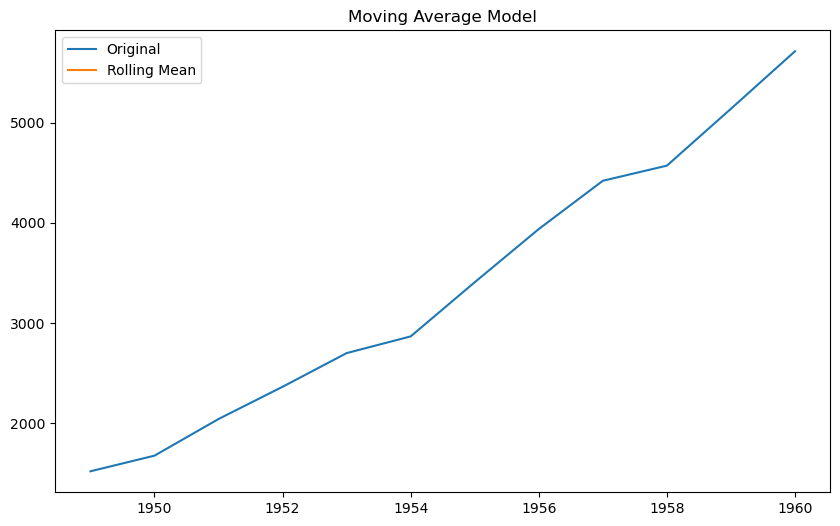

In [4]:
# Use a moving average of the last 12 values
flights_ma = flights.rolling(12).mean()

plt.figure(figsize=(10, 6))
plt.plot(flights, label='Original')
plt.plot(flights_ma, label='Rolling Mean')
plt.legend(loc='best')
plt.title('Moving Average Model')
plt.show()

5. Implementing an ARIMA model:

In [5]:
# Fit an ARIMA(5,1,0) model
model = ARIMA(flights, order=(5,1,0))
model_fit = model.fit()

# Print out summary information on the fit
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -68.177
Date:                Tue, 26 Dec 2023   AIC                            148.354
Time:                        12:29:35   BIC                            150.741
Sample:                             0   HQIC                           146.849
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6851      0.456      1.503      0.133      -0.208       1.579
ar.L2         -0.0203      0.270     -0.075      0.940      -0.550       0.510
ar.L3         -0.0799      0.340     -0.235      0.8

C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


6. Predicting future values:

C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


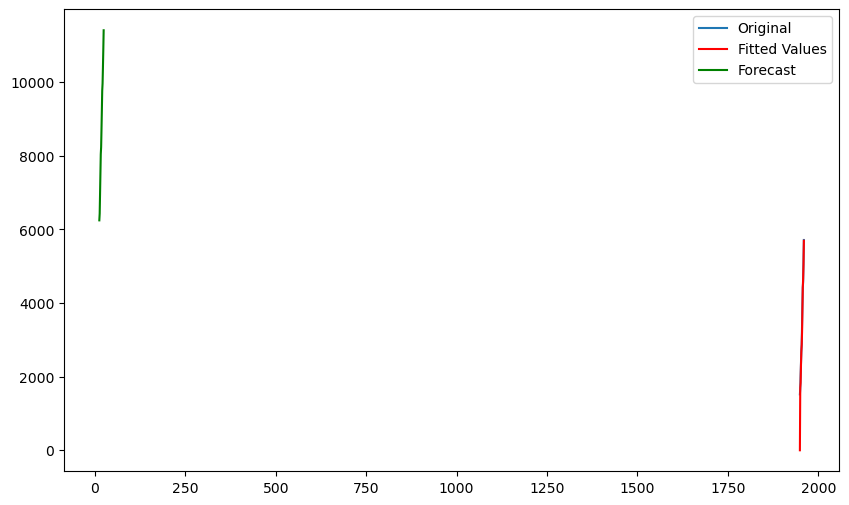

In [6]:
# Predict future values
start_index = len(flights)
end_index = start_index + 12
forecast = model_fit.predict(start=start_index, end=end_index)

# Plot the original data, the model predictions, and the forecast
plt.figure(figsize=(10, 6))
plt.plot(flights, label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast, color='green', label='Forecast')
plt.legend(loc='best')
plt.show()

This is a simplified example and does not include steps such as checking for stationarity, differencing the series if necessary, or validating the model's assumptions. You would want to include these steps in a more thorough analysis.

The warnings you're seeing are related to the index of your data and the stationarity of your time series data.
The first warning, "An unsupported index was provided and will be ignored when e.g. forecasting", means that the index of your pandas DataFrame or Series is not recognized as a date or period index, which is expected for time series data. You can convert the index to a datetime index to resolve this.
The second warning, "Non-stationary starting autoregressive parameters found", indicates that the ARIMA model has detected non-stationary parameters in your data. This is a common issue in time series analysis, as many time series datasets are non-stationary, meaning their statistical properties change over time.
One common method to make a time series stationary is differencing, where we subtract the previous observation from the current observation. Differencing can help to stabilize the mean of a time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.
Here's how you can modify your script to address these warnings:

C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


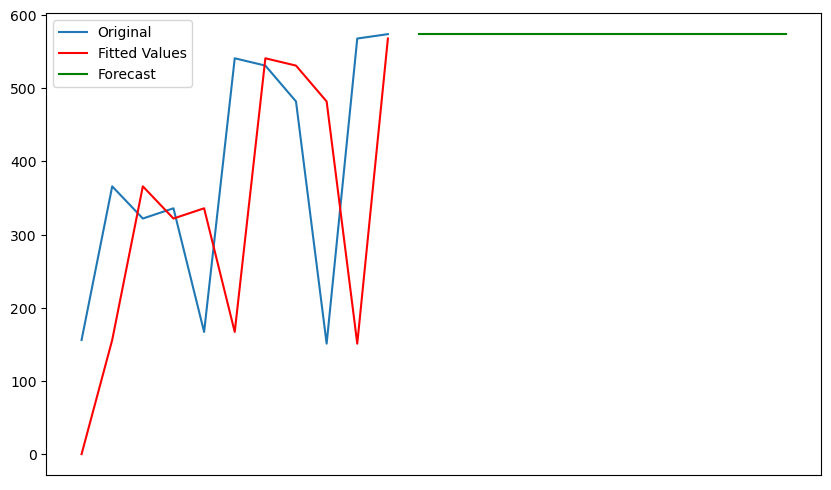

In [8]:
# Convert the index to datetime
flights.index = pd.to_datetime(flights.index)

# Difference the data to make it stationary
flights_diff = flights.diff().dropna()

# Fit an ARIMA(5,1,0) model on the differenced data
model = ARIMA(flights_diff, order=(5,1,0))
model_fit = model.fit()

# Predict future values
start_index = len(flights_diff)
end_index = start_index + 12
forecast = model_fit.predict(start=start_index, end=end_index)

# Plot the original data, the model predictions, and the forecast
plt.figure(figsize=(10, 6))
plt.plot(flights_diff, label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast, color='green', label='Forecast')
plt.legend(loc='best')
plt.show()

The warning "Non-stationary starting autoregressive parameters found. Using zeros as starting parameters." indicates that the ARIMA model has detected non-stationary parameters in your data, which can affect the model's performance.
One commonly used method to address non-stationarity is to difference the data until it becomes stationary. The order of differencing corresponds to the number of times the differencing operation is performed. In the previous script, the data was differenced once (first order differencing). However, sometimes, this might not be enough to make the data stationary, and higher order differencing might be required.
Another approach is to adjust the parameters of the ARIMA model. The ARIMA model has three parameters: p (the number of autoregressive terms), d (the number of nonseasonal differences needed for stationarity), and q (the number of lagged forecast errors in the prediction equation). Modifying these parameters might help to address the non-stationarity.
Here's how you can modify your script to implement second order differencing and adjust the ARIMA parameters:

C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\kamalap1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


ADF Statistic: -8.950794
p-value: 0.000000


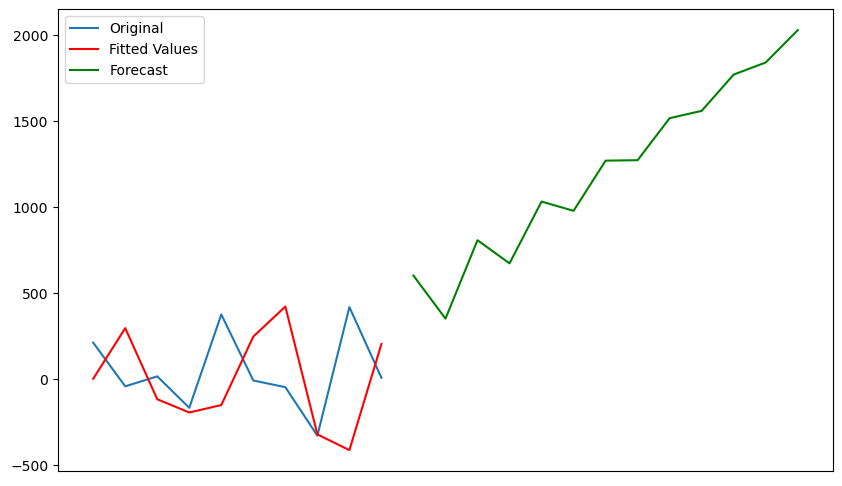

In [9]:
# Difference the data twice to make it stationary
flights_diff = flights.diff().diff().dropna()

# Test for stationarity with Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(flights_diff.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Fit an ARIMA(2,2,0) model on the differenced data
model = ARIMA(flights_diff, order=(2,2,0))
model_fit = model.fit()

# Predict future values
start_index = len(flights_diff)
end_index = start_index + 12
forecast = model_fit.predict(start=start_index, end=end_index)

# Plot the original data, the model predictions, and the forecast
plt.figure(figsize=(10, 6))
plt.plot(flights_diff, label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast, color='green', label='Forecast')
plt.legend(loc='best')
plt.show()

the optimal differencing order and ARIMA parameters depend on the specific characteristics of the data, and they are usually determined through a process of trial and error, guided by model diagnostics and validation measures such as the Akaike Information Criterion (AIC).
In the script provided, the data is differenced twice (second order differencing) and the ARIMA parameters are set to (2,2,0). This might help to address the non-stationarity warning. However, it's important to note that the optimal differencing order and ARIMA parameters may vary depending on the specific dataset.
It's also worth noting that if the data is over-differenced, it can introduce additional complexity into the model and can lead to issues such as increased model bias and reduced model efficiency. Therefore, it's important to confirm the stationarity of the differenced data (e.g., using the Augmented Dickey-Fuller test or by examining plots of the differenced data) and to validate the model's performance using appropriate metrics and diagnostic plots.
Finally, while the ARIMA model is a powerful and flexible tool for time series forecasting, it might not be the best choice for all types of time series data. Other models such as Exponential Smoothing models, Seasonal-Trend decomposition using LOESS (STL), and models based on machine learning techniques might be more appropriate depending on the specific characteristics of the data.